## Electric Vehicle Population Data


#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem statement
- Classifying Electric Vehicle Types with Machine Learning


### 2) Data Collection
- Dataset Source - https://data.wa.gov/Transportation/Electric-Vehicle-Population-Data/f6w7-q2d2/data_preview
- The data consists of 17 column and 191407 rows.

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame

In [57]:
df = pd.read_csv('EV_DATA.csv')

#### Show Top 5 Records

In [4]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJSA1E22K,King,Seattle,WA,98112.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,43.0,202233958,POINT (-122.300312 47.629782),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,3MW39FS05R,Yakima,Zillah,WA,98953.0,2024,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,20,0,15.0,264425178,POINT (-120.2658133 46.4063477),PACIFICORP,5.307700e+10
2,1N4AZ0CP0F,King,Kent,WA,98031.0,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,0,11.0,114962025,POINT (-122.201564 47.402358),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
3,5YJSA1H20F,Snohomish,Bothell,WA,98012.0,2015,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,0,1.0,232724670,POINT (-122.206146 47.839957),PUGET SOUND ENERGY INC,5.306105e+10
4,JTMAB3FV1N,Yakima,Yakima,WA,98908.0,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,14.0,221023589,POINT (-120.611068 46.596645),PACIFICORP,5.307700e+10


In [5]:
df.rename(columns={'County': 'Country'}, inplace=True)

#### Shape of the dataset

In [6]:
df.shape

(191407, 17)

### 2.2 Dataset information

This dataset shows the Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs) that are currently registered through Washington State Department of Licensing (DOL).

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check Missing values

In [7]:
df.isna().sum()

VIN (1-10)                                             0
Country                                                4
City                                                   4
State                                                  0
Postal Code                                            4
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 414
DOL Vehicle ID                                         0
Vehicle Location                                       8
Electric Utility                                       4
2020 Census Tract                                      4
dtype: int64

In [8]:
new_data = df.dropna()

In [9]:
new_data.isna().sum()

VIN (1-10)                                           0
Country                                              0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

#### Dropped the  missing values in the data set

### 3.2 Check Duplicates

In [10]:
new_data.duplicated().sum()

0

#### There are no duplicates  values in the data set

### 3.3 Check data types

In [11]:
# Check Null and Dtypes
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 190989 entries, 0 to 191406
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         190989 non-null  object 
 1   Country                                            190989 non-null  object 
 2   City                                               190989 non-null  object 
 3   State                                              190989 non-null  object 
 4   Postal Code                                        190989 non-null  float64
 5   Model Year                                         190989 non-null  int64  
 6   Make                                               190989 non-null  object 
 7   Model                                              190989 non-null  object 
 8   Electric Vehicle Type                              190989 non-null  object 
 9 

### 3.4 Checking the number of unique values of each column

In [12]:
new_data.nunique()

VIN (1-10)                                            11480
Country                                                  39
City                                                    477
State                                                     1
Postal Code                                             552
Model Year                                               23
Make                                                     42
Model                                                   147
Electric Vehicle Type                                     2
Clean Alternative Fuel Vehicle (CAFV) Eligibility         3
Electric Range                                          103
Base MSRP                                                31
Legislative District                                     49
DOL Vehicle ID                                       190989
Vehicle Location                                        552
Electric Utility                                         74
2020 Census Tract                       

### 3.5 Check statistics of data set

In [13]:
new_data.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,190989.000000,190989.000000,190989.000000,190989.000000,190989.000000,1.909890e+05,1.909890e+05
mean,98262.698742,2020.733529,55.630335,993.899832,29.017090,2.237421e+08,5.303985e+10
std,305.327672,2.990753,90.128825,8047.355590,14.909503,7.398037e+07,1.626802e+07
min,98001.000000,1997.000000,0.000000,0.000000,1.000000,4.385000e+03,5.300195e+10
25%,98052.000000,2019.000000,0.000000,0.000000,17.000000,1.861861e+08,5.303301e+10
50%,98125.000000,2022.000000,0.000000,0.000000,33.000000,2.328409e+08,5.303303e+10
75%,98372.000000,2023.000000,72.000000,0.000000,42.000000,2.589745e+08,5.305307e+10
max,99403.000000,2025.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.307794e+10


### 3.7 Exploring Data

In [14]:
new_data.head()

,VIN (1-10),Country,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJSA1E22K,King,Seattle,WA,98112.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,43.0,202233958,POINT (-122.300312 47.629782),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,3MW39FS05R,Yakima,Zillah,WA,98953.0,2024,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,20,0,15.0,264425178,POINT (-120.2658133 46.4063477),PACIFICORP,5.307700e+10
2,1N4AZ0CP0F,King,Kent,WA,98031.0,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,0,11.0,114962025,POINT (-122.201564 47.402358),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
3,5YJSA1H20F,Snohomish,Bothell,WA,98012.0,2015,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,0,1.0,232724670,POINT (-122.206146 47.839957),PUGET SOUND ENERGY INC,5.306105e+10
4,JTMAB3FV1N,Yakima,Yakima,WA,98908.0,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,14.0,221023589,POINT (-120.611068 46.596645),PACIFICORP,5.307700e+10


In [15]:
print("Categories in 'Country' variable:     ",end=" " )
print(new_data['Country'].unique())

print("Categories in 'Model' variable:  ",end=" ")
print(new_data['Model'].unique())

print("Categories in'Electric Vehicle Type' variable:",end=" " )
print(new_data['Electric Vehicle Type'].unique())

print("Categories in 'Clean Alternative Fuel Vehicle (CAFV) Eligibility' variable:     ",end=" " )
print(new_data['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].unique())

print("Categories in 'Electric Utility' variable:     ",end=" " )
print(new_data['Electric Utility'].unique())

Categories in 'Country' variable:      ['King' 'Yakima' 'Snohomish' 'Thurston' 'Kitsap' 'Whitman' 'Walla Walla'
 'Kittitas' 'Douglas' 'Grant' 'Chelan' 'Skagit' 'Stevens' 'Clark'
 'Cowlitz' 'Jefferson' 'Island' 'Clallam' 'Klickitat' 'Spokane' 'Pierce'
 'Mason' 'San Juan' 'Benton' 'Whatcom' 'Okanogan' 'Lewis' 'Grays Harbor'
 'Asotin' 'Pacific' 'Franklin' 'Skamania' 'Columbia' 'Lincoln' 'Garfield'
 'Adams' 'Wahkiakum' 'Pend Oreille' 'Ferry']
Categories in 'Model' variable:   ['MODEL S' '330E' 'LEAF' 'RAV4 PRIME' 'MODEL 3' 'FUSION' 'PRIUS PRIME'
 '500' 'PACIFICA' 'I4' 'MODEL Y' 'PRIUS PLUG-IN' 'A3' 'I3' 'X5' 'XC90'
 'TAYCAN' 'WRANGLER' 'KONA' 'XC60' 'MODEL X' 'F-150' 'ID.4' 'VOLT'
 'SPORTAGE' 'GLC-CLASS' 'SORENTO' 'RAV4' 'COUNTRYMAN' 'C-MAX' 'HARDTOP'
 'E-TRON' 'BOLT EV' 'OUTLANDER' 'X3' 'CLARITY' 'SOUL EV' 'TUCSON' '745E'
 'NIRO' 'R1S' 'Q5 E' 'B-CLASS' 'I-PACE' 'C40' 'KONA ELECTRIC' 'EV6' 'BZ4X'
 'GRAND CHEROKEE' 'Q8' 'CAYENNE' 'HORNET' 'BOLT EUV' 'MUSTANG MACH-E'
 'EQS-CLASS SEDAN' '530E

In [16]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if new_data[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if new_data[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 7 numerical features : ['Postal Code', 'Model Year', 'Electric Range', 'Base MSRP', 'Legislative District', 'DOL Vehicle ID', '2020 Census Tract']

We have 10 categorical features : ['VIN (1-10)', 'Country', 'City', 'State', 'Make', 'Model', 'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Vehicle Location', 'Electric Utility']


In [17]:
new_data.head(2)

,VIN (1-10),Country,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJSA1E22K,King,Seattle,WA,98112.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,43.0,202233958,POINT (-122.300312 47.629782),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,3MW39FS05R,Yakima,Zillah,WA,98953.0,2024,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,20,0,15.0,264425178,POINT (-120.2658133 46.4063477),PACIFICORP,5.307700e+10


### 3.8 Adding New Columns for new features "Vehicle Age", "Price per Mile of Range" and "Make-Model"

In [18]:
# Create new features
current_year = 2024  # Assuming the current year is 2024
new_data['Vehicle Age'] = current_year - new_data['Model Year']
new_data['Price per Mile of Range'] = new_data['Base MSRP'] / new_data['Electric Range']
new_data['Make-Model'] = new_data['Make'] + '-' + new_data['Model']

new_data.head()

,VIN (1-10),Country,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract,Vehicle Age,Price per Mile of Range,Make-Model
0,5YJSA1E22K,King,Seattle,WA,98112.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,43.0,202233958,POINT (-122.300312 47.629782),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10,5,0.0,TESLA-MODEL S
1,3MW39FS05R,Yakima,Zillah,WA,98953.0,2024,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,20,0,15.0,264425178,POINT (-120.2658133 46.4063477),PACIFICORP,5.307700e+10,0,0.0,BMW-330E
2,1N4AZ0CP0F,King,Kent,WA,98031.0,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,0,11.0,114962025,POINT (-122.201564 47.402358),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10,9,0.0,NISSAN-LEAF
3,5YJSA1H20F,Snohomish,Bothell,WA,98012.0,2015,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,0,1.0,232724670,POINT (-122.206146 47.839957),PUGET SOUND ENERGY INC,5.306105e+10,9,0.0,TESLA-MODEL S
4,JTMAB3FV1N,Yakima,Yakima,WA,98908.0,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,14.0,221023589,POINT (-120.611068 46.596645),PACIFICORP,5.307700e+10,2,0.0,TOYOTA-RAV4 PRIME


### 4. Exploring Data ( Visualization )
#### 4.1 Visualize average score distribution to make some conclusion. 
- Histogram
- Kernel Distribution Function (KDE)

#### 4.1.1 Distribution Of Electric Vehicle Types


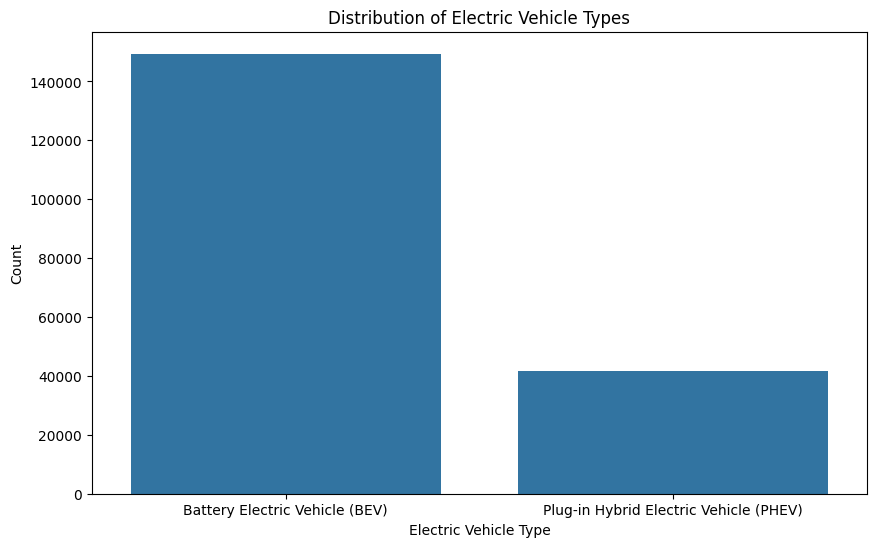

In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Electric Vehicle Type', data=new_data)
plt.title('Distribution of Electric Vehicle Types')
plt.xlabel('Electric Vehicle Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

### Distribution Of Model Years


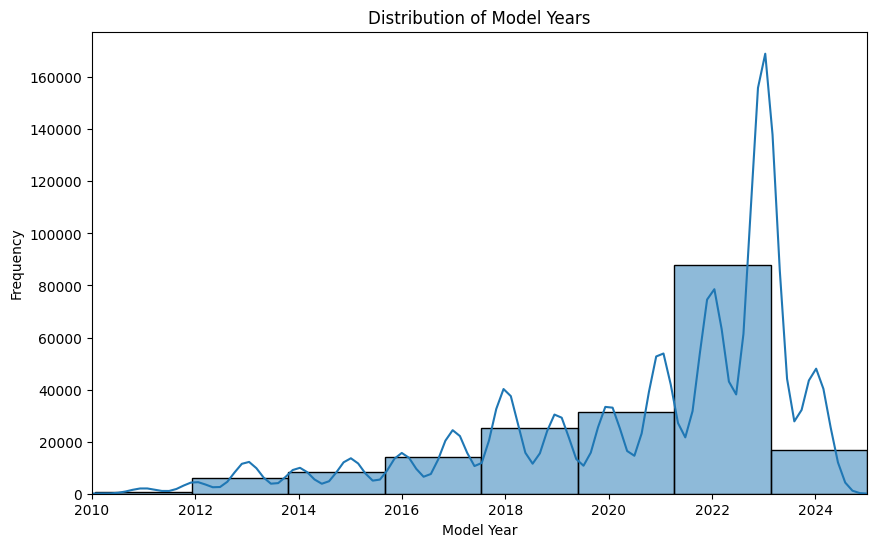

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(new_data['Model Year'], bins=15, kde=True)
plt.title('Distribution of Model Years')
plt.xlabel('Model Year')
plt.ylabel('Frequency')
plt.xlim(2010, new_data['Model Year'].max())
plt.show()

#####  Insights
- Relationship between Base MSRP and Electric Range

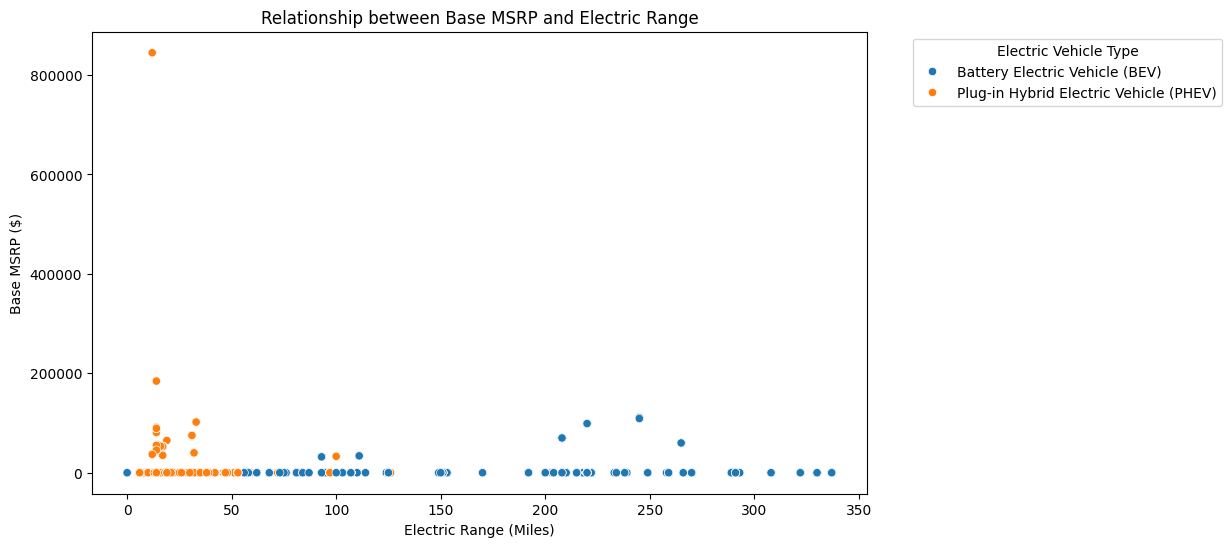

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Electric Range', y='Base MSRP', hue='Electric Vehicle Type', data=new_data)
plt.title('Relationship between Base MSRP and Electric Range')
plt.xlabel('Electric Range (Miles)')
plt.ylabel('Base MSRP ($)')
plt.legend(title='Electric Vehicle Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#####  Insights
- Distribution of Vehicle Age

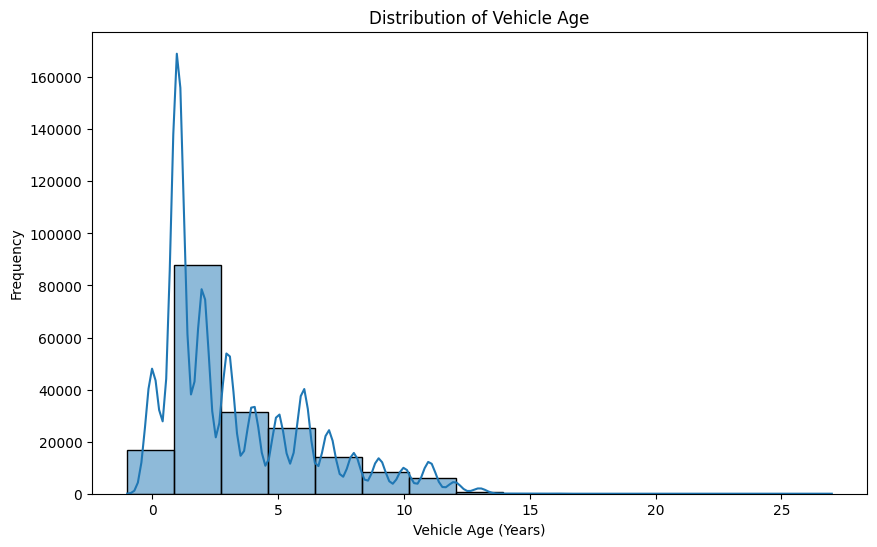

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(new_data['Vehicle Age'], bins=15, kde=True)
plt.title('Distribution of Vehicle Age')
plt.xlabel('Vehicle Age (Years)')
plt.ylabel('Frequency')
plt.show()

#####  Insights
- # Heatmap of Correlation Matrix

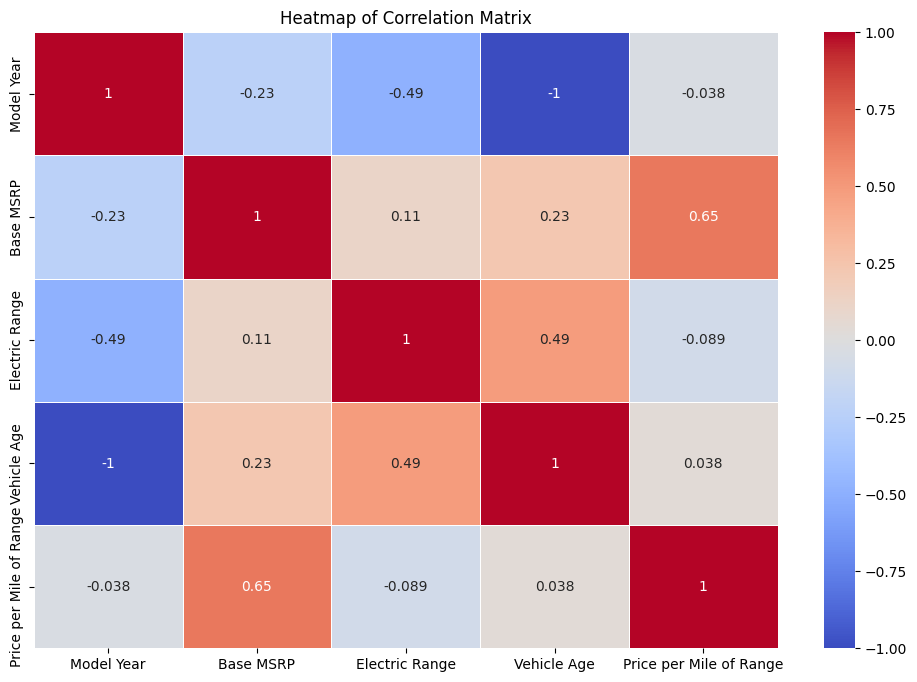

In [26]:
plt.figure(figsize=(12, 8))
correlation_matrix = new_data[['Model Year', 'Base MSRP', 'Electric Range', 'Vehicle Age', 'Price per Mile of Range']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()

#### 4.3 Multivariate analysis using pieplot

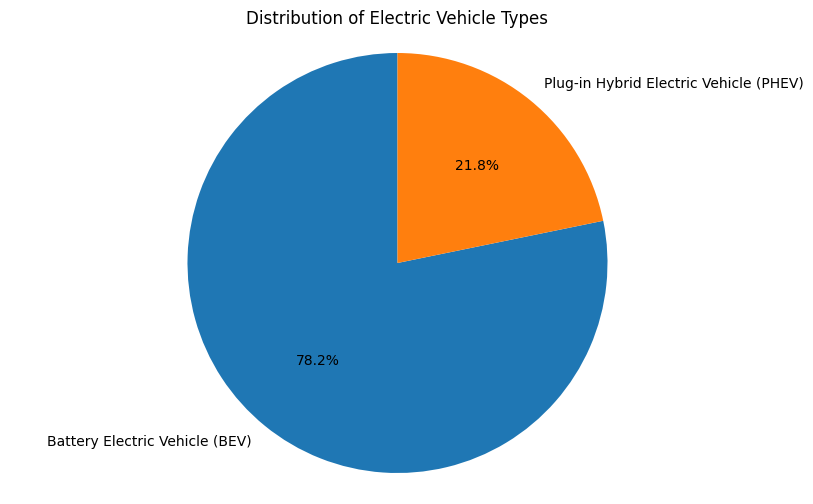

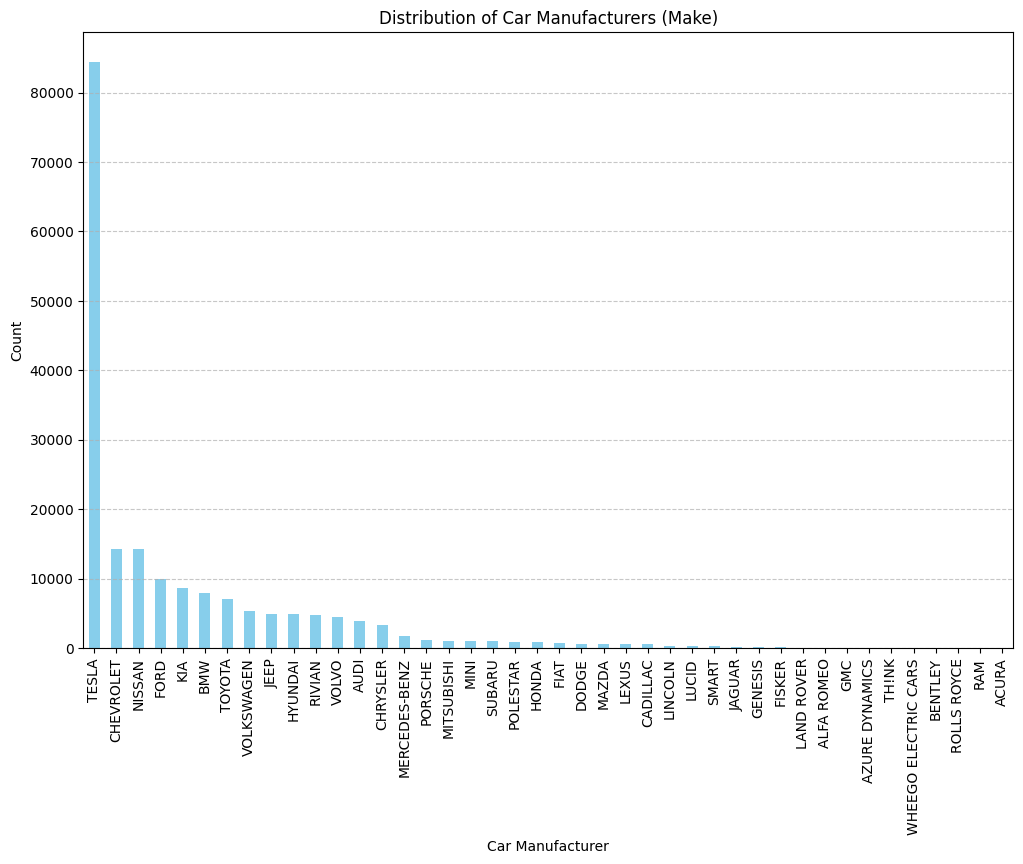

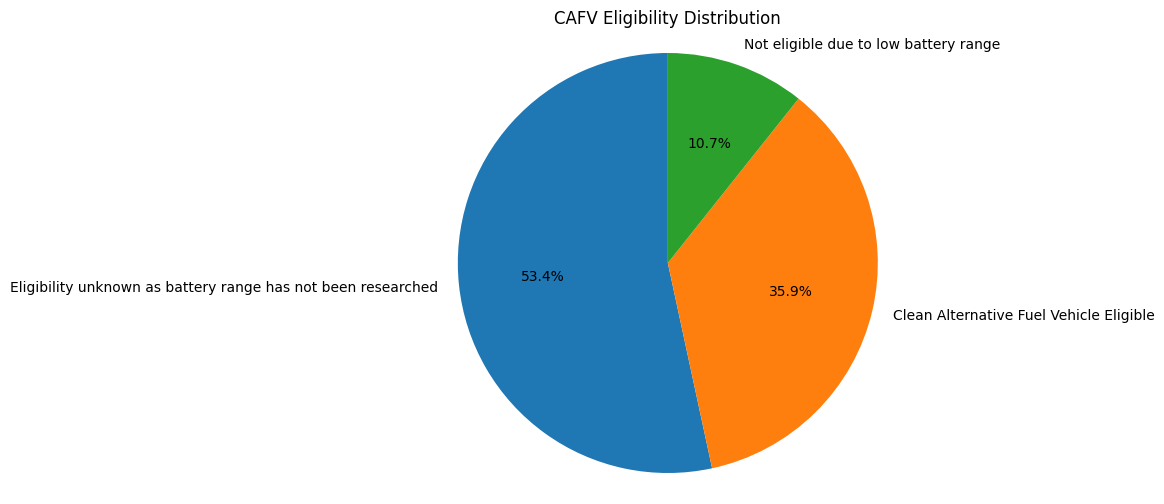

In [27]:
plt.rcParams['figure.figsize'] = (30, 12)


plt.figure(figsize=(10, 6))
new_data['Electric Vehicle Type'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Electric Vehicle Types')
plt.ylabel('')
plt.axis('equal')
plt.show()


plt.figure(figsize=(12, 8))
data_counts = new_data['Make'].value_counts()
data_counts.plot(kind='bar', color='skyblue')

plt.title('Distribution of Car Manufacturers (Make)')
plt.xlabel('Car Manufacturer')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


plt.figure(figsize=(10, 6))
new_data['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('CAFV Eligibility Distribution')
plt.ylabel('')
plt.axis('equal')
plt.show()


In [28]:
new_data.columns

Index(['VIN (1-10)', 'Country', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract',
       'Vehicle Age', 'Price per Mile of Range', 'Make-Model'],
      dtype='object')

#### 4.4 Feature Wise Visualization
#### 4.4.1 ELECTRIC RANGE

#### UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

Text(0.5, 1.0, 'Electric Range Distribution')

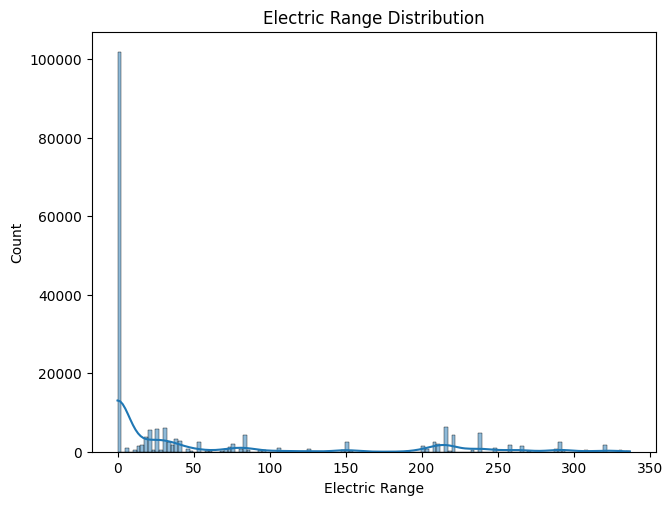

In [29]:
plt.figure(figsize=(16, 12))

plt.subplot(2, 2, 1)
sns.histplot(new_data['Electric Range'], kde=True)
plt.title('Electric Range Distribution')

Text(0.5, 1.0, 'Model Year Distribution')

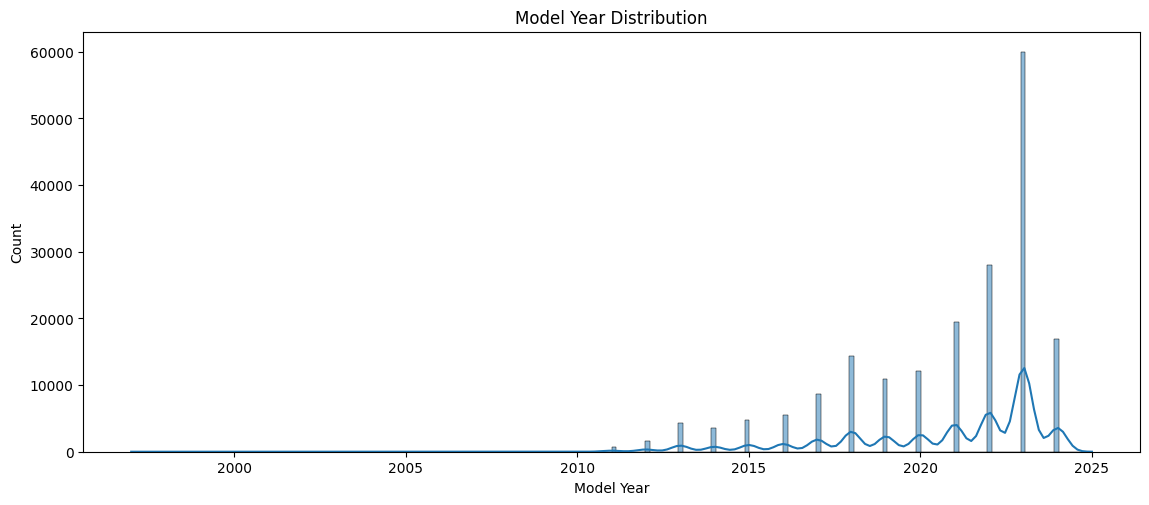

In [31]:
plt.subplot(2, 2, 3)
sns.histplot(new_data['Model Year'], kde=True)
plt.title('Model Year Distribution')

In [34]:
new_data.columns

Index(['VIN (1-10)', 'Country', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract',
       'Vehicle Age', 'Price per Mile of Range', 'Make-Model'],
      dtype='object')

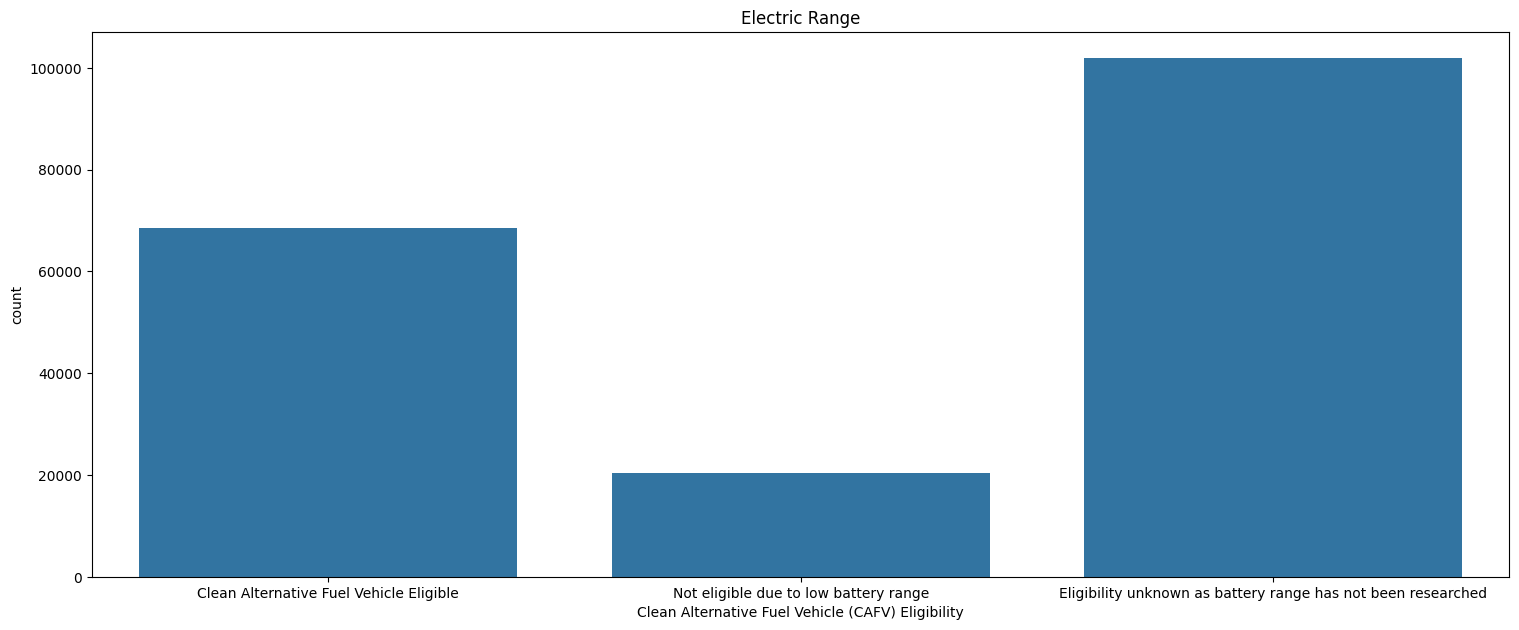

In [41]:
plt.subplot(2, 2, 4)
sns.countplot(x='Clean Alternative Fuel Vehicle (CAFV) Eligibility', data=new_data)
plt.title('Electric Range')

plt.tight_layout()
plt.show()

#### UNIVARIATE ANALYSIS ( How is Group wise distribution ?)

#### Insights 
- Most of the student belonging from group C /group D.
- Lowest number of students belong to groupA.

#### BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )

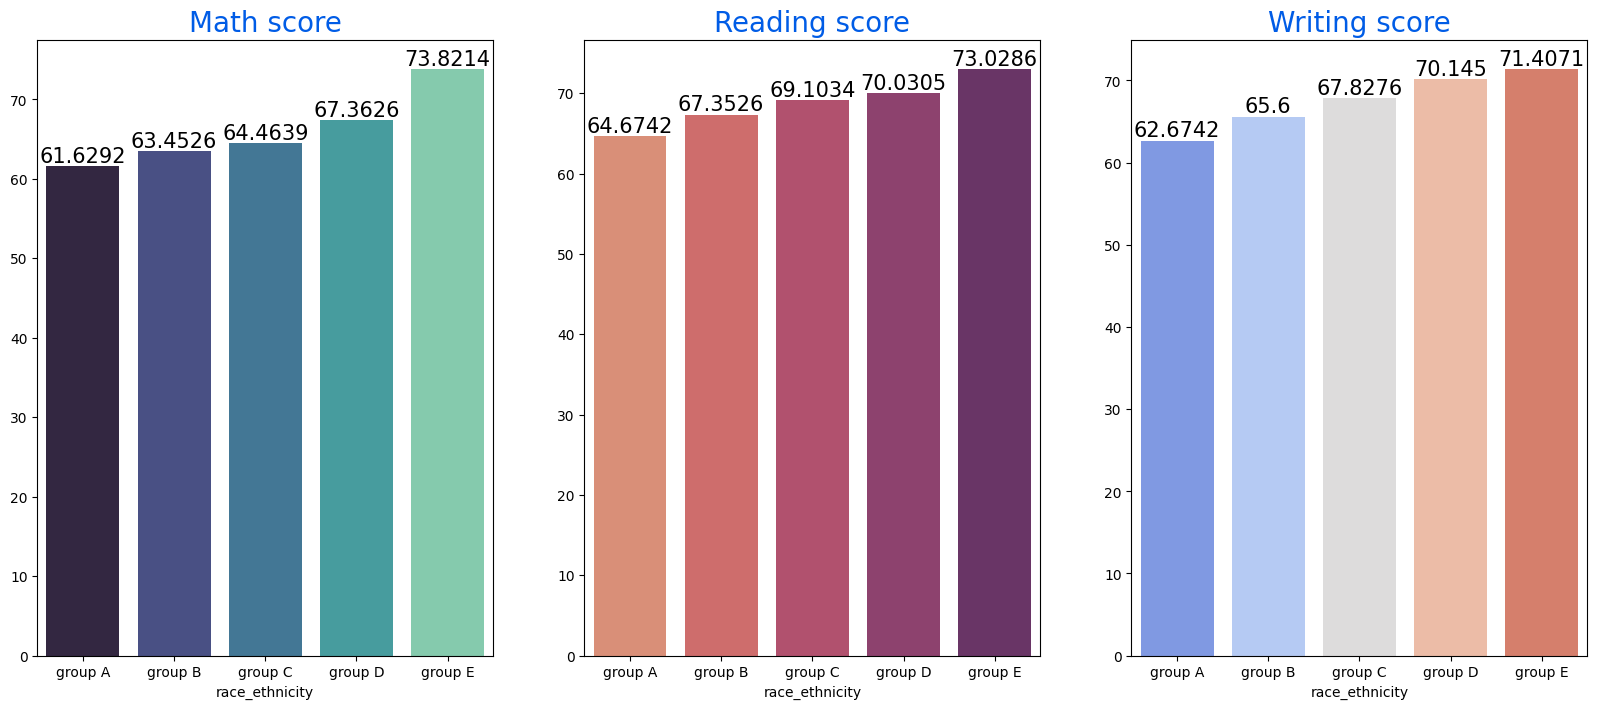

In [ ]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

#### Insights 
- Group E students have scored the highest marks. 
- Group A students have scored the lowest marks. 
- Students from a lower Socioeconomic status have a lower avg in all course subjects

#### 4.4.3 PARENTAL LEVEL OF EDUCATION COLUMN
- What is educational background of student's parent ?
- Is parental education has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )

In [47]:
new_data.head(1)

,VIN (1-10),Country,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract,Vehicle Age,Price per Mile of Range,Make-Model
0,5YJSA1E22K,King,Seattle,WA,98112.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,43.0,202233958,POINT (-122.300312 47.629782),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10,5,0.0,TESLA-MODEL S


In [49]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(new_data['Vehicle Age'], palette = 'Blues')
plt.title('Comparison of Base MSRP', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

KeyboardInterrupt: 

#### Insights 
- Largest number of parents are from some college.

#### BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? )

In [ ]:
df.groupby('parental_level_of_education').agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

TypeError: Could not convert malefemalemalemalefemalemalefemalefemalemalemalefemalefemalefemalemalefemalefemalemalefemalemalemalefemalemalefemalefemalemalefemalemalefemalemalemalefemalemalefemalefemalemalemalefemalemalemalefemalefemalemalemalefemalefemalefemalemalefemalemalefemalemalefemalemalefemalemalefemalemalemalemalemalemalefemalemalefemalefemalemalemalemalemalemalemalefemalemalefemalefemalefemalefemalemalefemalemalemalemalemalemalemalemalefemalemalemalefemalemalefemalemalefemalemalefemalemalemalemalefemalemalemalemalefemalemalefemalefemalemalefemalefemalefemalefemalemalemalefemalefemalefemalemalefemalefemalefemalefemalefemalefemalefemalemalefemalemalemalemalefemalefemalefemalemalefemalefemalemalemalefemalefemalefemalefemalefemalefemalemalemalemalefemalefemalefemalefemalemalefemalemalemalemalemalefemalemalemalefemalefemalefemalefemalefemalefemalefemalemalefemalemalefemalefemalemalemalefemalefemalemalemalefemalemalefemalefemalemalefemalefemalefemalefemalefemalemalefemalemalemalefemalemalemalemalemalemalemalefemalefemalefemalefemalefemalefemalemalefemalefemalefemalemalemalemalemalemalefemalemalefemalefemalemalefemalefemalefemale to numeric

#### Insights 
- The score of student whose parents possess master and bachelor level education are higher than others.

#### 4.4.4 LUNCH COLUMN 
- Which type of lunch is most common amoung students ?
- What is the effect of lunch type on test results?


#### UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? )

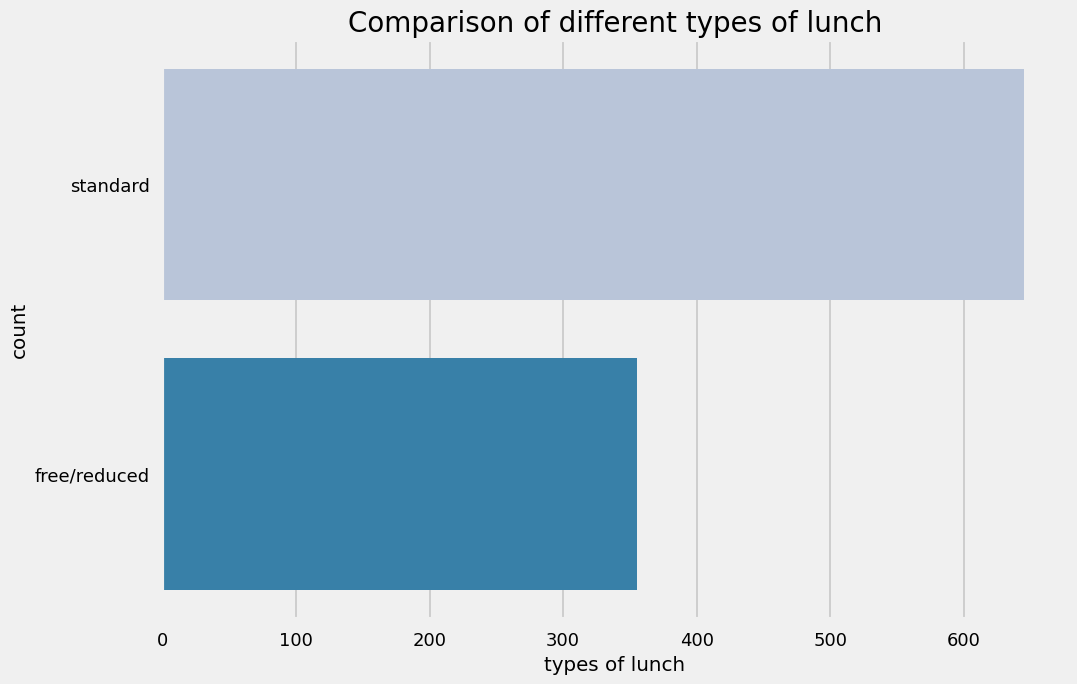

In [ ]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-talk')
sns.countplot(df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

#### Insights 
- Students being served Standard lunch was more than free lunch

#### BIVARIATE ANALYSIS (  Is lunch type intake has any impact on student's performance ? )

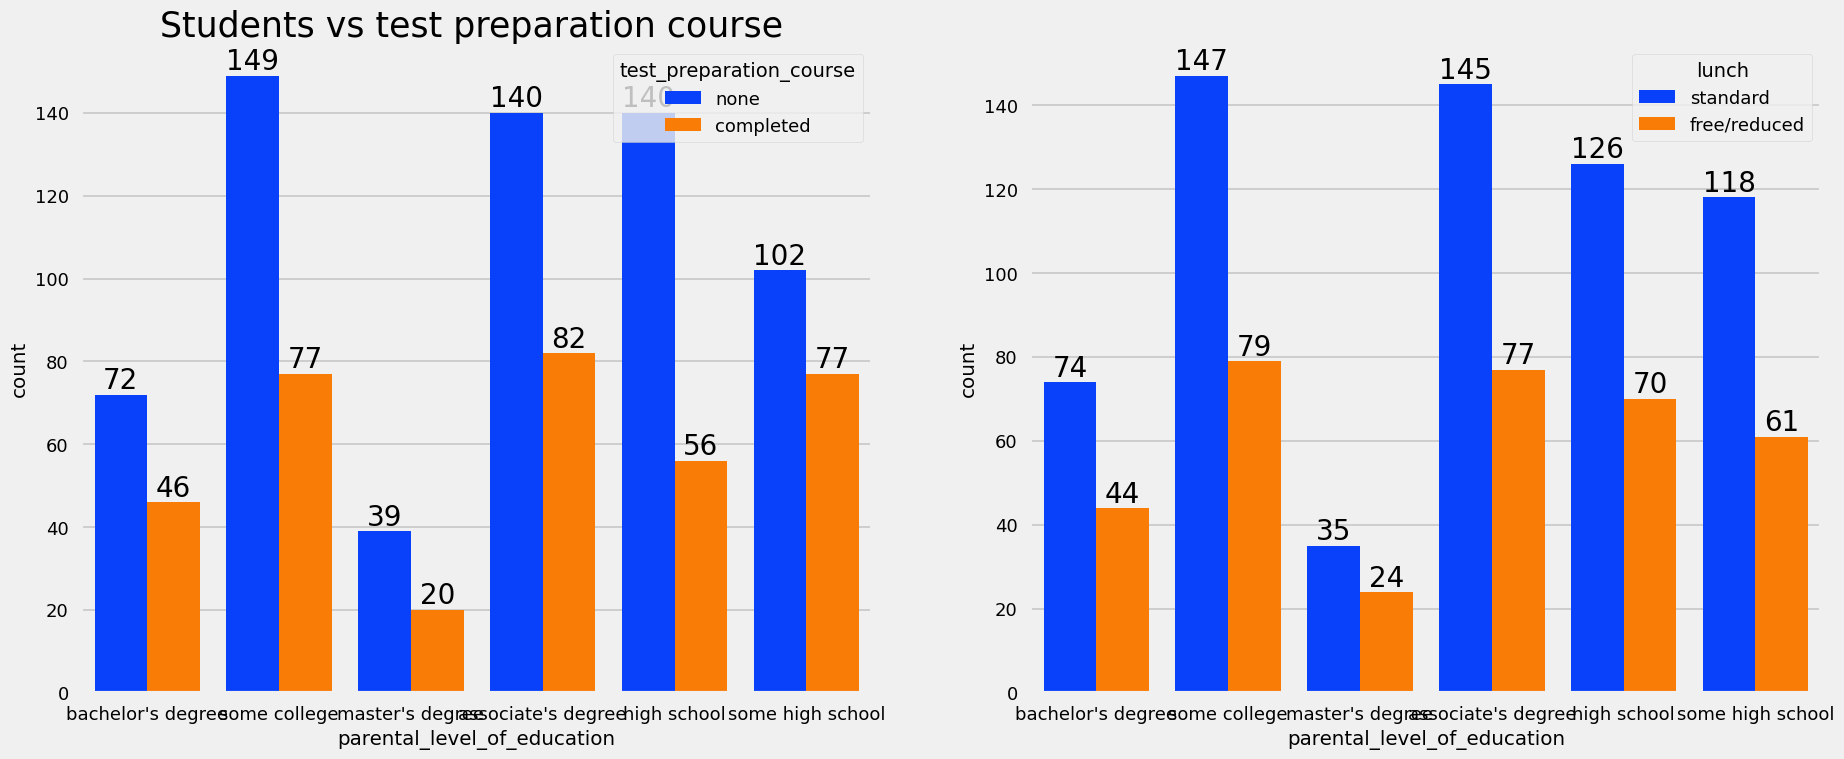

In [ ]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='test_preparation_course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)   

#### Insights 
- Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

#### 4.4.5 TEST PREPARATION COURSE COLUMN 
- Which type of lunch is most common amoung students ?
- Is Test prepration course has any impact on student's performance ?

#### BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )

<Axes: xlabel='lunch', ylabel='writing_score'>

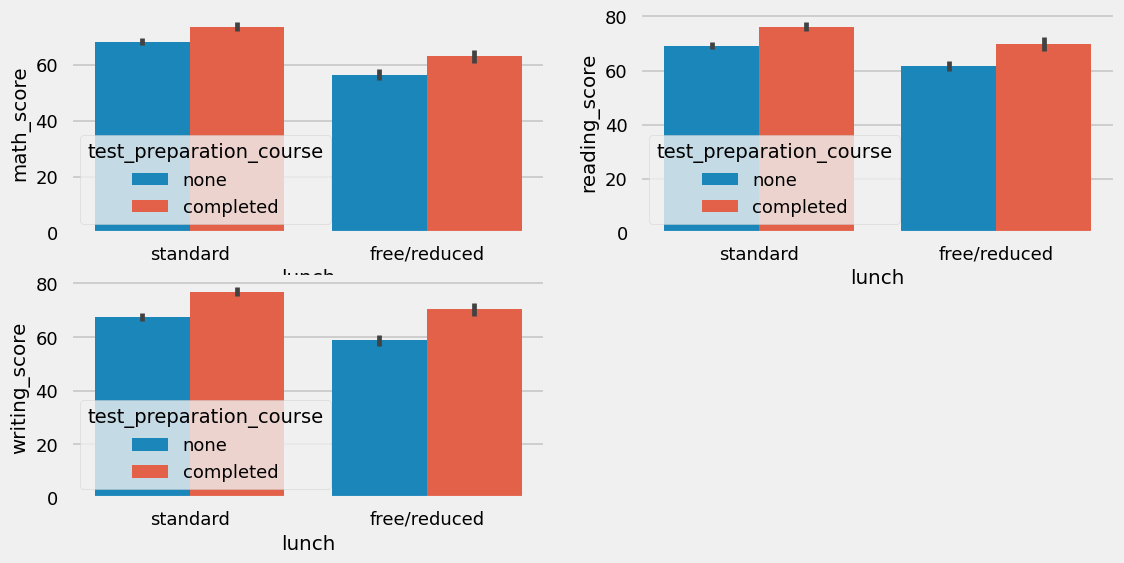

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])

#### Insights  
- Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

#### 4.4.6 CHECKING OUTLIERS

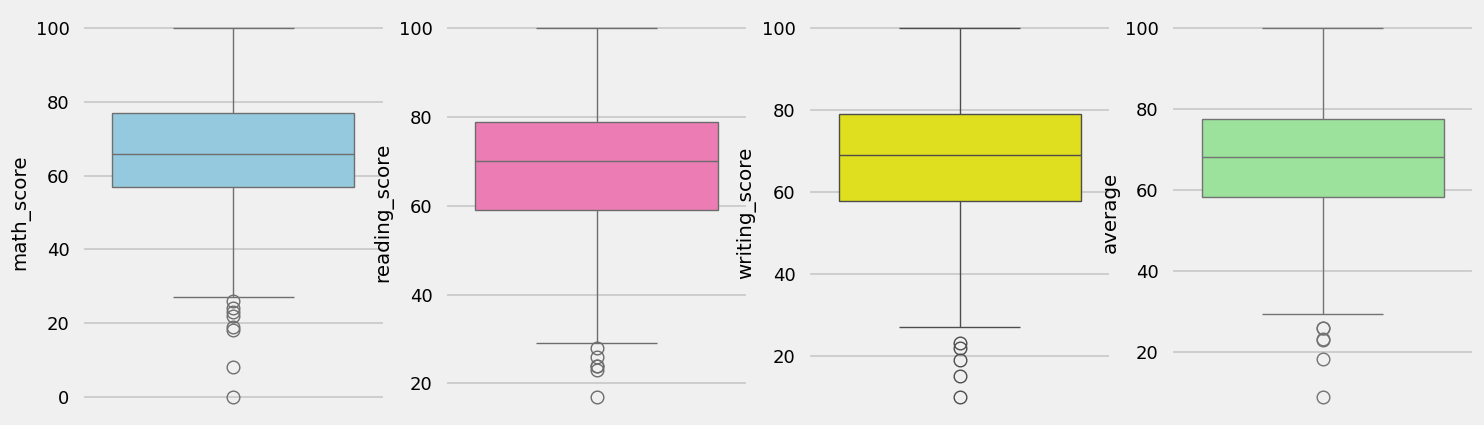

In [ ]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

#### 4.4.7 MUTIVARIATE ANALYSIS USING PAIRPLOT

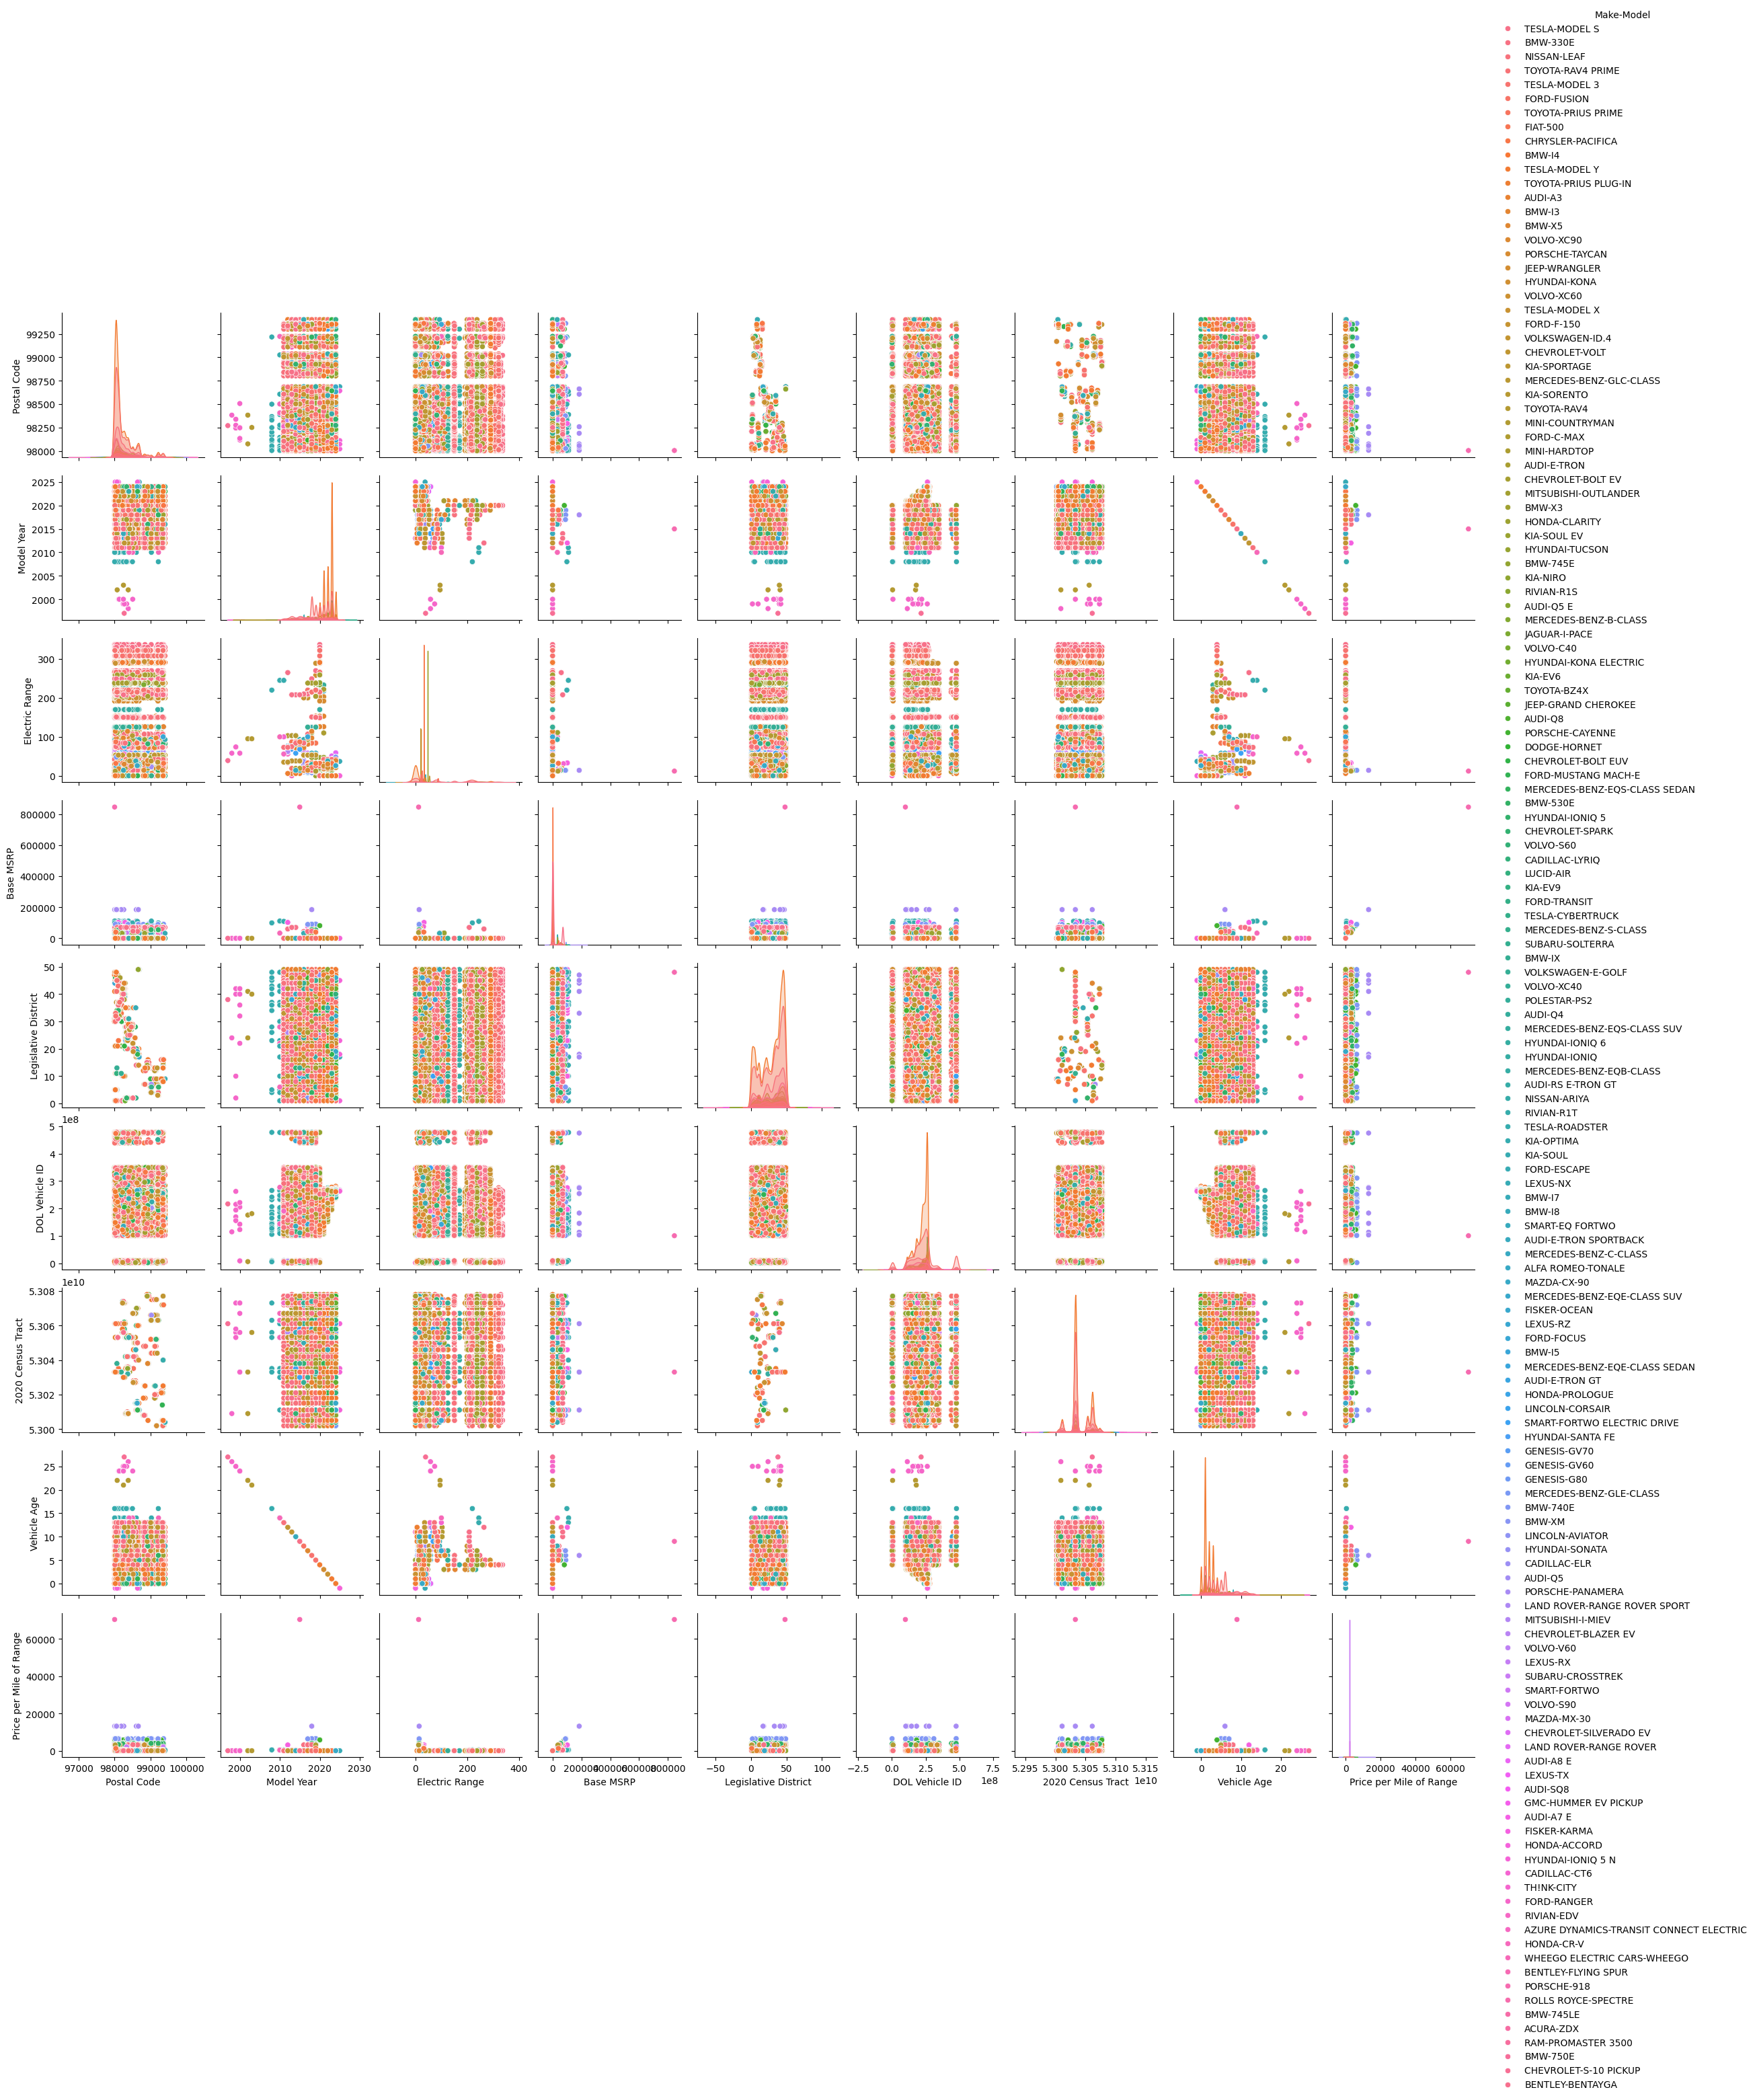

In [ ]:
sns.pairplot(new_data , hue = 'Make-Model')
plt.show()

In [59]:
new_data.head()

,VIN (1-10),Country,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract,Vehicle Age,Price per Mile of Range,Make-Model
0,5YJSA1E22K,King,Seattle,WA,98112.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,43.0,202233958,POINT (-122.300312 47.629782),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10,5,0.0,TESLA-MODEL S
1,3MW39FS05R,Yakima,Zillah,WA,98953.0,2024,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,20,0,15.0,264425178,POINT (-120.2658133 46.4063477),PACIFICORP,5.307700e+10,0,0.0,BMW-330E
2,1N4AZ0CP0F,King,Kent,WA,98031.0,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,0,11.0,114962025,POINT (-122.201564 47.402358),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10,9,0.0,NISSAN-LEAF
3,5YJSA1H20F,Snohomish,Bothell,WA,98012.0,2015,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,0,1.0,232724670,POINT (-122.206146 47.839957),PUGET SOUND ENERGY INC,5.306105e+10,9,0.0,TESLA-MODEL S
4,JTMAB3FV1N,Yakima,Yakima,WA,98908.0,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,14.0,221023589,POINT (-120.611068 46.596645),PACIFICORP,5.307700e+10,2,0.0,TOYOTA-RAV4 PRIME
